## Exploratory Data Analysis

In [1]:
data_dir = "../input/zomato-bangalore-restaurants/zomato.csv"

In [2]:
import pandas as pd

df = pd.read_csv(data_dir)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print("Number of rows in the dataset ", df.shape[0])
print("Number of columns in the dataset ", df.shape[1])

Number of rows in the dataset  51717
Number of columns in the dataset  17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

From the above information, we can see there are "null" values present in some of the columns. Let us take a look at their count.

In [5]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Text(0.5, 1.0, 'Null Values')

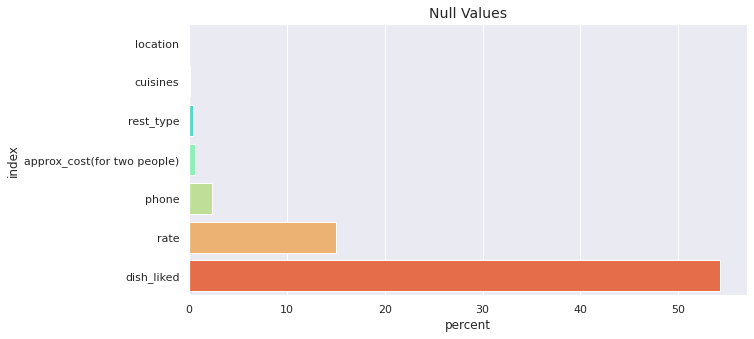

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

data = df.isna().sum()
data = data[data>0].sort_values()
data = data.reset_index()
data['percent'] = round((data[0]/df.shape[0])*100, 3)
fig = plt.figure(figsize = (10, 5))  
sns.barplot(x='percent', y='index', data=data, palette='rainbow') 
plt.title("Null Values", fontsize=14)

#### "dish_liked" is the column with highest number of null values, more than 50 % followed by "rate" column. It wouldn't make sense to keep "dish_liked" column in case you are planning to build a recommendation system but since we are only focused on EDA in this notebook, we can let it be.
#### At that cue, let us look at the values in "rate" column.

In [7]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Looking at the unique values, we can see that we need to perform some processing on this column before we can gather insights from it.

In [8]:
print("Number of restaurants with NEW rating: ", df[df['rate'] == 'NEW'].shape[0])
print("Number of restaurants with nan rating: ", df[df['rate'].isnull()].shape[0])
print("Number of restaurants with - rating: ", df[df['rate'] == '-'].shape[0])

Number of restaurants with NEW rating:  2208
Number of restaurants with nan rating:  7775
Number of restaurants with - rating:  69


In [9]:
df[df['rate'] == '-']['votes'].unique()

array([0])

In [10]:
df[df['rate'].isnull()]['votes'].unique()

array([   0, 2497, 1251, 1137,  326,  285,  131,   16,  122,  283,  143,
         80,  167,  339,    6,    4,  475, 2508, 2464, 1240, 1221, 1168,
        149,  465, 1037,  265, 1313,  155,  350,  299,    5,   10,  132,
        257])

In [11]:
df[df['rate'] == 'NEW']['votes'].unique()

array([0])

In [12]:
df['rate'].value_counts().sort_values(ascending=False)

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [13]:
# creating a dataframe without null, '-' and 'NEW' value in 'rate' column
tmp_df = df[~df['rate'].isnull()]
tmp_df = tmp_df[(tmp_df['rate'] != "NEW") & (tmp_df['rate']!="-")]

<Figure size 720x360 with 0 Axes>

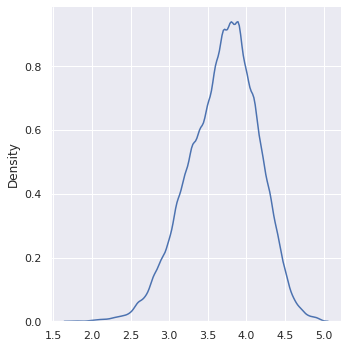

In [14]:
tmp_df['rate'].value_counts().sort_values(ascending=False)
scores = tmp_df.rate.apply(lambda x:x.split('/')[0].strip())
scores = [float(x) for x in scores]
plt.figure(figsize = (10, 5))
sns.displot(scores, kind='kde')

While the number of restaurants with "-" rating is very less and the restaurants with null rating and "NEW" rating is considerably high. Let us perform some replacements for the above restaurants. As all the restaurants with "-" or "NEW" rating has 0 votes, we can give them "0.0/5" rating. On the other hand, for restaurants with null rating, let us impute it with median rating since the data seems to be normally distributed. 

In [15]:
import numpy as np

avg = np.mean(scores)
med = np.median(scores)
print(avg, '|', med)

3.7004488179527177 | 3.7


In [16]:
df['rate'].fillna("3.7/5", inplace=True)
df['rate'].replace("NEW", "0.0/5", inplace=True)
df['rate'].replace("-", "0.0/5", inplace=True)

In [17]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0.0/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Let us now convert the rate into a numeric column for our use.

In [18]:
# processing the column values to discard / and denominator
df.rate = df.rate.apply(lambda x:x.split('/')[0].strip())
df = df.astype({'rate' : float})
df['rate'].value_counts().sort_values(ascending=False)

3.7    11596
3.9     3972
3.8     3873
3.6     3316
4.0     3183
4.1     2948
3.5     2784
3.4     2476
3.3     2310
0.0     2277
4.2     2184
3.2     1873
4.3     1693
3.1     1561
4.4     1147
3.0     1023
2.9      802
4.5      656
2.8      600
2.7      307
4.6      300
2.6      260
4.7      167
2.5      101
2.4       70
4.8       66
4.9       55
2.3       51
2.2       26
2.1       24
2.0       11
1.8        5
Name: rate, dtype: int64

Majority of the restaurants have been assigned a rating 3.7 out of 5 which also includes our imputed data. We will now try to perform some EDA on restaurant data based on the location. Let us start with finding all the unique locations listed in the given dataset.

In [19]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

We have NaN values in the dataframe, so lets filter out those rows for EDA.

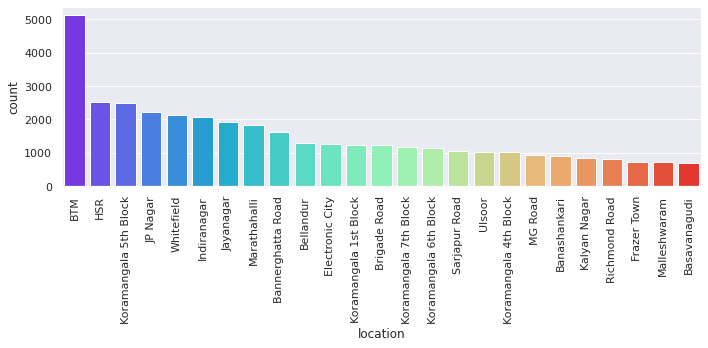

In [20]:
df = df[~df['location'].isnull()]
location_grp = df.groupby(['location']).agg(['count'])['name'].reset_index()
location_grp.sort_values(by="count", inplace=True, ascending=False)
fig = plt.figure(figsize = (10, 5))  
sns.barplot(x="location", y="count", data=location_grp[:25], palette='rainbow')
plt.xticks(rotation=90)
plt.tight_layout()

As we may see above most of our restaurants are from "BTM" location which is closely followed by Koramangala (across different blocks). Let's try to visualize the same information on geolocation map with the help of heatmaps.

In [21]:
from geopy.geocoders import Nominatim

i = 0

def findGeocode(city):
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:     
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="app_name") 
        loc = geolocator.geocode(city)
        return loc
    except GeocoderTimedOut:
        i += 1
        if i == 5:
            return None
        return findGeocode(city)    

Finding the latitude and longitude of all the locations for visualization in the map

In [22]:
location_lat_long = {}
locations_unq = df.location.unique()
for loc in locations_unq:
    loc = loc + ", Bangalore"
    location = findGeocode(loc)
    if location is None:
        print("Not found.. ", loc)
        continue
    lat = location.latitude
    long = location.longitude
    location_lat_long[loc] = [lat, long]
    print("Saved.. ", loc)

Saved..  Banashankari, Bangalore
Saved..  Basavanagudi, Bangalore
Saved..  Mysore Road, Bangalore
Saved..  Jayanagar, Bangalore
Saved..  Kumaraswamy Layout, Bangalore
Saved..  Rajarajeshwari Nagar, Bangalore
Saved..  Vijay Nagar, Bangalore
Saved..  Uttarahalli, Bangalore
Saved..  JP Nagar, Bangalore
Saved..  South Bangalore, Bangalore
Saved..  City Market, Bangalore
Saved..  Nagarbhavi, Bangalore
Saved..  Bannerghatta Road, Bangalore
Saved..  BTM, Bangalore
Saved..  Kanakapura Road, Bangalore
Saved..  Bommanahalli, Bangalore
Saved..  CV Raman Nagar, Bangalore
Saved..  Electronic City, Bangalore
Saved..  HSR, Bangalore
Saved..  Marathahalli, Bangalore
Saved..  Sarjapur Road, Bangalore
Saved..  Wilson Garden, Bangalore
Saved..  Shanti Nagar, Bangalore
Saved..  Koramangala 5th Block, Bangalore
Saved..  Koramangala 8th Block, Bangalore
Saved..  Richmond Road, Bangalore
Saved..  Koramangala 7th Block, Bangalore
Saved..  Jalahalli, Bangalore
Saved..  Koramangala 4th Block, Bangalore
Saved.. 

Removing the rows with location "Rammurthy Nagar" from dataset as geocoder was not able to find the latitude and longitude of the location.

In [23]:
df = df[df['location']!="Rammurthy Nagar"]

In [24]:
from tqdm import tqdm 
# Appending the data to dataframes
heatmap_data = []
for indx, row in tqdm(df.iterrows(), total=len(df)):
    if row['location']+", Bangalore" in location_lat_long:
        df.loc[indx, 'latitude'] = location_lat_long[row['location']+", Bangalore"][0]
        df.loc[indx, 'longitude'] = location_lat_long[row['location']+", Bangalore"][1]
        heatmap_data.append([location_lat_long[row['location']+", Bangalore"][0], location_lat_long[row['location']+", Bangalore"][1]])

100%|██████████| 51664/51664 [00:33<00:00, 1558.93it/s]


In [25]:
import folium

# the given location latitude and longitude are for India map
# india = folium.Map(location=[20.180862078886562, 78.77642751195584], tiles='openstreetmap', zoom_start=4.5)
bengaluru = folium.Map(location=[12.972442, 77.580643], tiles='openstreetmap', zoom_start=12.3)

In [26]:
from folium import plugins

plugins.HeatMap(heatmap_data).add_to(bengaluru)

In [27]:
bengaluru

We can clearly see the high concentration of heatmap in the BTM Layout and Koramangala areas. Let us do some exploration of the restaurants in these two areas.

In [28]:
import re

df['location_pr'] = df.location.apply(lambda x:re.sub("[0-9]+(st|th|nd|rd) block", "", x.lower()).strip())
koramangala_btm = df[(df['location_pr'] == 'btm') | (df['location_pr'] == 'koramangala')]

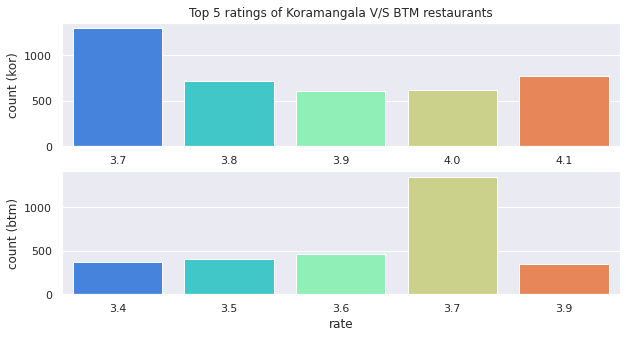

In [29]:
korr = koramangala_btm[koramangala_btm['location_pr'] == 'koramangala']
btm = koramangala_btm[koramangala_btm['location_pr'] == 'btm']

korr_rate_grp = korr.groupby(['rate']).agg({'name':'count'}).reset_index()
korr_rate_grp.sort_values(by="name", inplace=True, ascending=False)
btm_rate_grp = btm.groupby(['rate']).agg({'name':'count'}).reset_index()
btm_rate_grp.sort_values(by="name", inplace=True, ascending=False)

fig = plt.figure(figsize = (10, 5))
ax1 = plt.subplot(2,1,1)
plt.title('Top 5 ratings of Koramangala V/S BTM restaurants')
sns.barplot(x="rate", y="name", data=korr_rate_grp[:5], ax=ax1, palette='rainbow')
plt.ylabel('count (kor)')
ax2 = plt.subplot(2,1,2)
sns.barplot(x="rate", y="name", data=btm_rate_grp[:5], ax=ax2, palette='rainbow')
plt.ylabel('count (btm)')
plt.show()

We can see that although the number of restaurants in BTM layout is the highest, majority of them are rated average or below by the users. So can we say, **"quantity does not always guarantee quality?"**

For Koramangala, the number of averagely rated restaurants is quite high as well but overall, it does not drops below average. The restaurants are decently rated. 

This makes me curious which location has the highest rated restaurants. Let us find out.

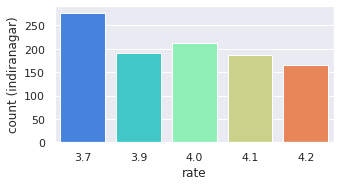

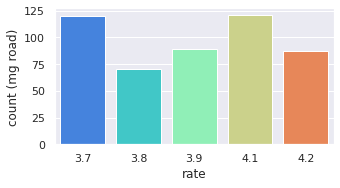

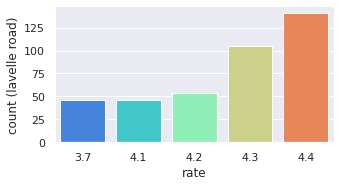

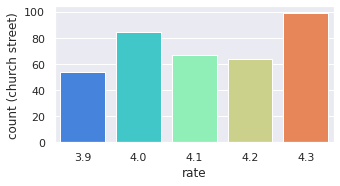

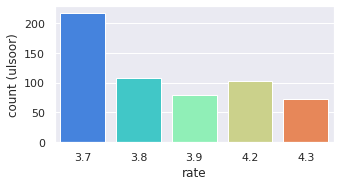

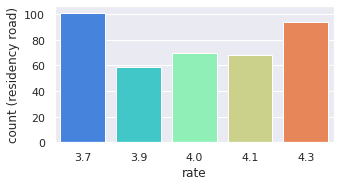

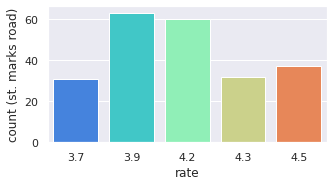

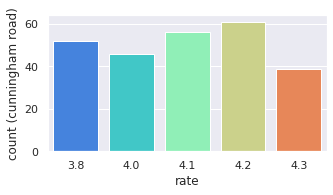

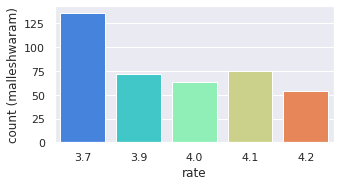

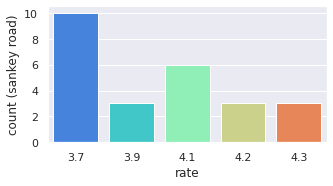

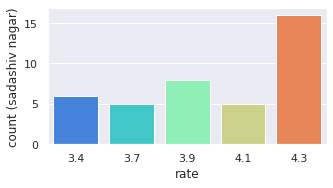

In [30]:
loc_rate_grp = df.groupby(['location_pr', 'rate']).agg({'name':'count'}).reset_index()
loc_rate_grp.sort_values(by=["location_pr", 'name'], inplace=True, ascending=False)
loc_unq = df.location_pr.unique()
for i, loc in enumerate(loc_unq):
    data = loc_rate_grp[(loc_rate_grp['location_pr'] == loc)]
    data = data[:5]
    if data[data.rate > 4].shape[0] > 1:
        fig = plt.figure(figsize = (5, 2.5))
        sns.barplot(x="rate", y="name", data=data, palette='rainbow')
        plt.ylabel(f'count ({loc})')
        plt.show()

We can see that **Lavelle Road** tops when it comes to having more high rated restaurants closely followed by **Church Street**. But does high rating mean high prices too? Let's check.  

In [31]:
# processing the column to float column for analysis
df['approx_cost'] = df['approx_cost(for two people)'].apply(lambda x: float(str(x).replace(",", "")))

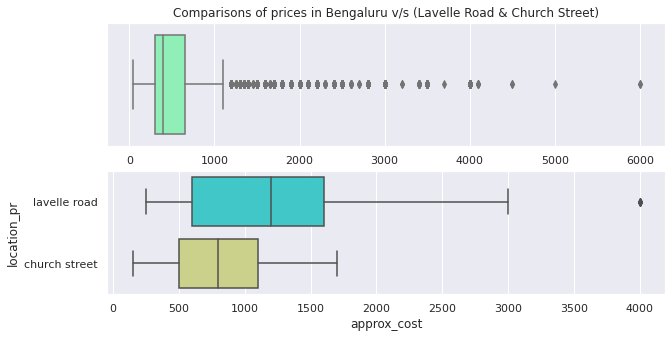

In [32]:
lavelle_church = df[(df['location_pr'] == 'lavelle road') | (df['location_pr'] == 'church street')]
fig = plt.figure(figsize = (10, 5))
ax1 = plt.subplot(2,1,1)
plt.title('Comparisons of prices in Bengaluru v/s (Lavelle Road & Church Street)')
sns.boxplot(x="approx_cost", data=df, ax=ax1, palette='rainbow')
ax2 = plt.subplot(2,1,2)
sns.boxplot(x="approx_cost", y="location_pr", data=lavelle_church, ax=ax2, palette='rainbow')
plt.show()

Well, it does seems that restaurants of **Lavelle Road** fall in the expensive band of the restaurants as compared to rest of the restaurants of Bengaluru where majority of the restaurants fall within the range of Rs. 1000 for two persons.
However, we can see there are far more expensive restaurants in Bengaluru, going as far as Rs 5000 to 6000 for two people. Let us gather some more insights from this data.

<AxesSubplot:xlabel='approx_cost', ylabel='location_pr'>

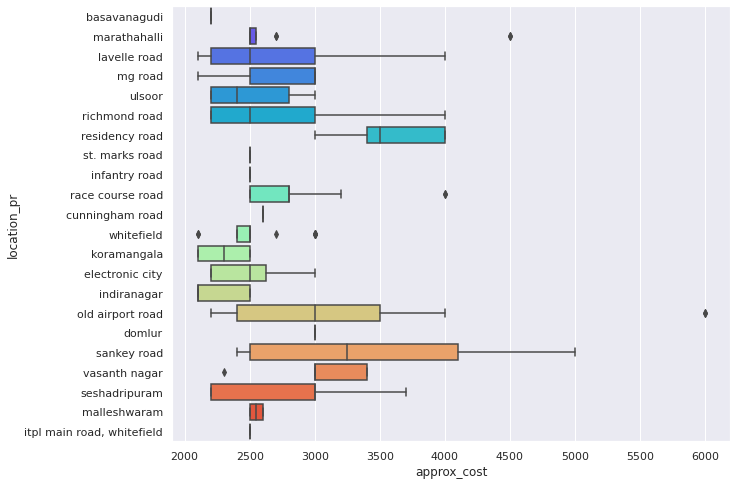

In [33]:
fig = plt.figure(figsize = (10, 8))
expensive_restaurants = df[df.approx_cost > 2000]
sns.boxplot(x='approx_cost', y='location_pr', data=expensive_restaurants, palette='rainbow')

As we may see, **Sankey Road, Old Airport Road & Residency Road** have the most expensive restaurants in Bengaluru.

Text(0.5, 0, 'count @ residency road')

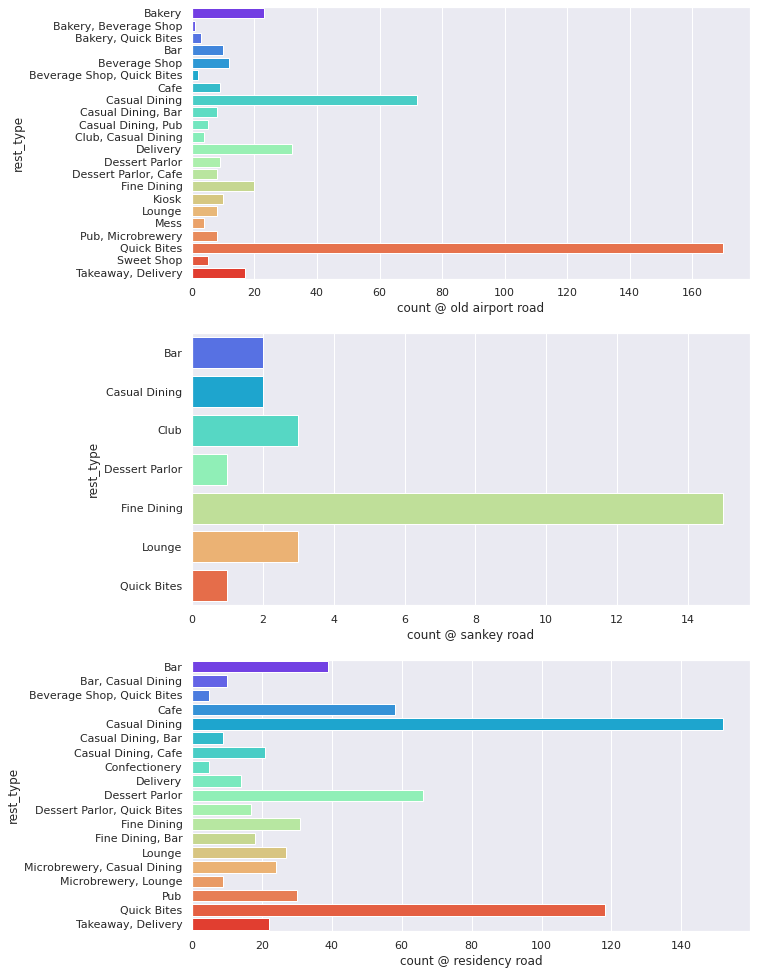

In [34]:
super_expensive_res = df[(df['location_pr'] == 'sankey road') | (df['location_pr'] == 'old airport road') | (df['location_pr'] == 'residency road')]
super_expensive_res = super_expensive_res.groupby(['location_pr', 'rest_type']).agg({'name':'count'}).reset_index()
super_expensive_res.rename(columns={'name':'count'}, inplace=True)

# .barplot(data=super_expensive_res, x='count', y='location_pr', hue='rest_type')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (10, 17))
sns.barplot(data=super_expensive_res[super_expensive_res.location_pr=='old airport road'], x='count', y='rest_type', ax=ax[0], palette='rainbow')
ax[0].set_xlabel('count @ old airport road')
sns.barplot(data=super_expensive_res[super_expensive_res.location_pr=='sankey road'], x='count', y='rest_type', ax=ax[1], palette='rainbow')
ax[1].set_xlabel('count @ sankey road')
sns.barplot(data=super_expensive_res[super_expensive_res.location_pr=='residency road'], x='count', y='rest_type', ax=ax[2], palette='rainbow')
ax[2].set_xlabel('count @ residency road')

In [35]:
df['listed_in(type)'].value_counts()

Delivery              25901
Dine-out              17772
Desserts               3593
Cafes                  1722
Drinks & nightlife     1101
Buffet                  878
Pubs and bars           697
Name: listed_in(type), dtype: int64

In [36]:
# tmp_df = df[~df['cuisines'].isnull()]
# new_df = pd.DataFrame(columns=df.columns)
# i = 0
# for indx, row in tqdm(tmp_df.iterrows(), total=len(tmp_df)):
#     cuisines = [x.strip() for x in row['cuisines'].split(",")]
#     for cuisine in cuisines:
#         new_df.loc[i, :] = row
#         new_df.loc[i, 'cuisines'] = cuisine
#         i = i + 1

In [37]:
# print(df.shape)
# print(new_df.shape)

In [38]:
res_grp = df.groupby(['name']).agg(['count'])['address'].reset_index()
res_grp.sort_values(by="count", inplace=True, ascending=False)
print(res_grp.shape)

(8774, 2)


#### It will not logical to plot the count for 8792 restaurants. So let us take a look at the **top 50** restuarants with many outlets.

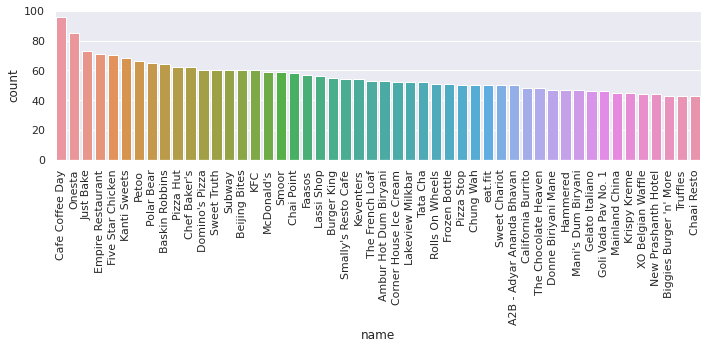

In [39]:
fig = plt.figure(figsize = (10, 5))  
sns.barplot(x="name", y="count", data=res_grp[:50])
plt.xticks(rotation=90)
plt.tight_layout()

#### We can see that Cafe Coffee Day, Onesta, Just Bake, Empire Restaurant are some of the restaurants with large number of outlets.